Carregue uma imagem à sua escolha.

Saving Gude.jpg to Gude.jpg


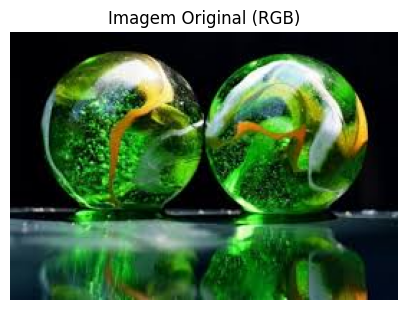

In [4]:
# Módulos essenciais
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image

# Upload da imagem
uploaded = files.upload()

# Carregando a imagem (pega o primeiro arquivo enviado)
img_path = list(uploaded.keys())[0]
img_bgr = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Função para mostrar imagem
def show_img(img, title='', cmap=None):
    plt.figure(figsize=(5,5))
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Mostra imagem original
show_img(img_rgb, "Imagem Original (RGB)")

Utilize o script para extrair os canais R, G e B separadamente.

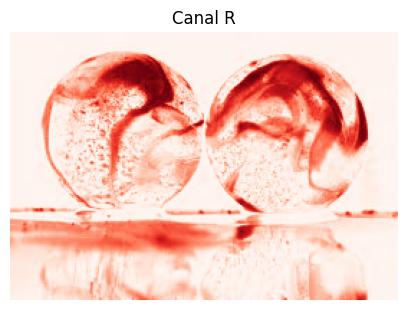

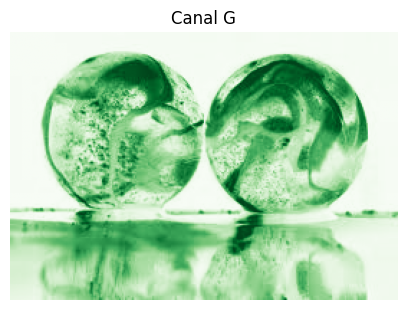

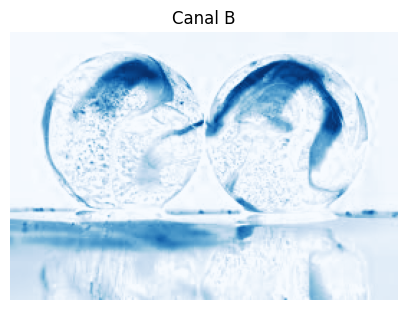

In [6]:
# Separar canais RGB
R, G, B = cv2.split(img_rgb)
show_img(R, "Canal R", cmap='Reds')
show_img(G, "Canal G", cmap='Greens')
show_img(B, "Canal B", cmap='Blues')



Analizando a luminosidade

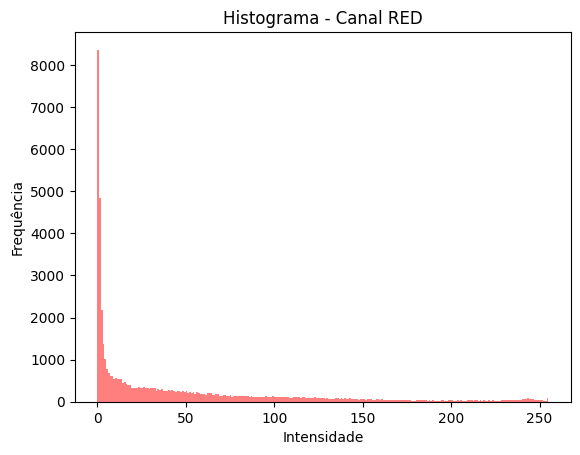

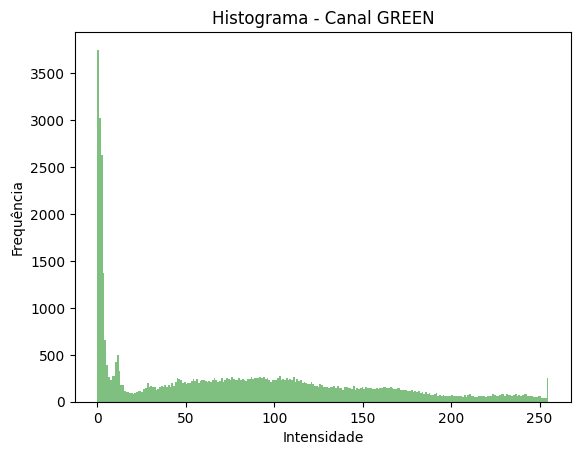

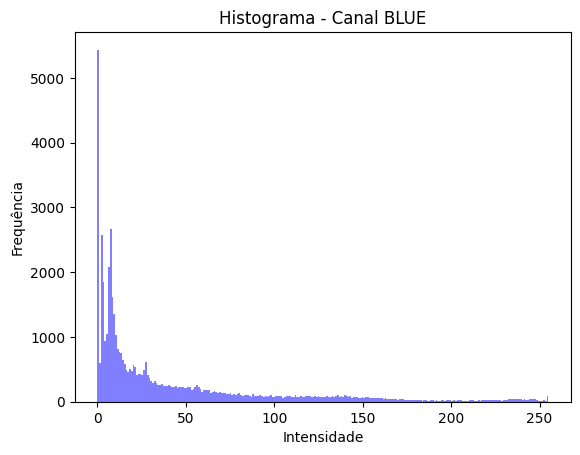

In [58]:
# 4. Histograma de cada canal (RGB)
img_np = np.array(img_rgb)
colors = ['red', 'green', 'blue']
for i, color in enumerate(colors):
    plt.hist(img_np[:, :, i].flatten(), bins=256, color=color, alpha=0.5)
    plt.title(f"Histograma - Canal {color.upper()}")
    plt.xlabel("Intensidade")
    plt.ylabel("Frequência")
    plt.show()

Anote: Qual canal mais contribui para a percepção de luminosidade da imagem?
 - O canal Verde e em seguida o Azul são os que aparentão ser os mais luminosos

Converta a imagem para o modelo CMYK (simulado)

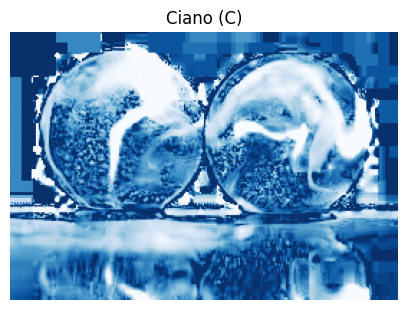

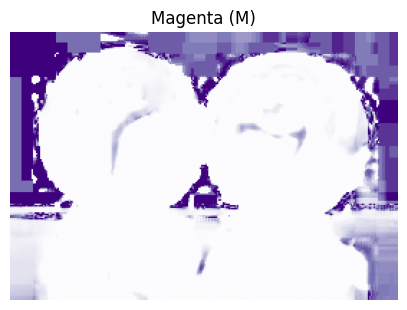

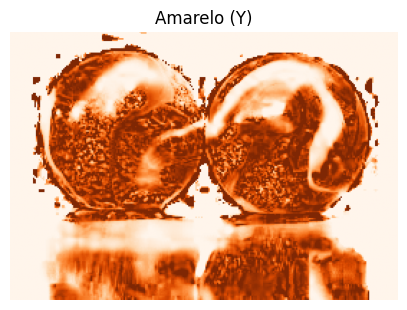

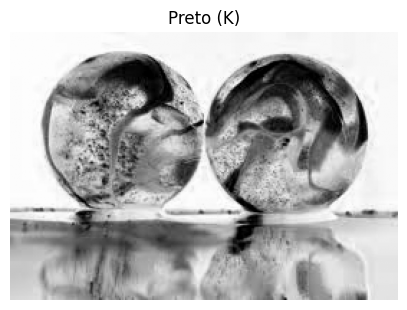

In [11]:
# Conversão RGB → CMYK (simulada)
# Normalizando os canais RGB para [0,1]
rgb_norm = img_rgb.astype(float) / 255
R, G, B = rgb_norm[:,:,0], rgb_norm[:,:,1], rgb_norm[:,:,2]

K = 1 - np.max(rgb_norm, axis=2)
C = (1 - R - K) / (1 - K + 1e-8)
M = (1 - G - K) / (1 - K + 1e-8)
Y = (1 - B - K) / (1 - K + 1e-8)

# Multiplicando por 255 para visualizar em escala de imagem
C_img = (C * 255).astype(np.uint8)
M_img = (M * 255).astype(np.uint8)
Y_img = (Y * 255).astype(np.uint8)
K_img = (K * 255).astype(np.uint8)

show_img(C_img, "Ciano (C)", cmap='Blues')
show_img(M_img, "Magenta (M)", cmap='Purples')
show_img(Y_img, "Amarelo (Y)", cmap='Oranges')
show_img(K_img, "Preto (K)", cmap='gray')


Anote: O que muda visualmente entre os canais de RGB e CMYK?

- Onde anteriomente não apresentava pigmentação forte agora possuem pigmentação extremamente forte e pontos onde ja havia pigmentação passaram a não possuir e como se realça-se a cor dos pontos onde normalmente nós não interpretavamos visialmante as cores.

Parte 2

Saving Gude.jpg to Gude (1).jpg


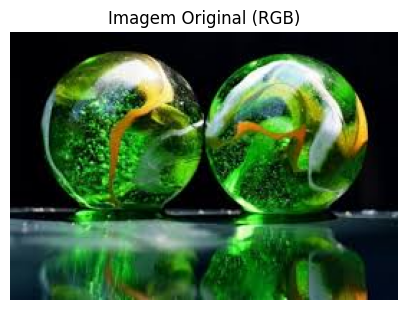

In [23]:
# Módulos essenciais
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image, ImageOps
import os

# Upload da imagem
uploaded = files.upload()

# Carregando a imagem (pega o primeiro arquivo enviado)
img_path = list(uploaded.keys())[0]
img_bgr = cv2.imread(img_path)

# Verificar se a imagem foi carregada corretamente
if img_bgr is None:
    print(f"Erro ao carregar a imagem em: {img_path}. Verifique o caminho e o arquivo.")
else:
    img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # Função para mostrar imagem
    def show_img(img, title='', cmap=None):
        plt.figure(figsize=(5,5))
        plt.imshow(img, cmap=cmap)
        plt.title(title)
        plt.axis('off')
        plt.show()

    # Mostra imagem original
    show_img(img, "Imagem Original (RGB)")
    img = Image.fromarray(img)

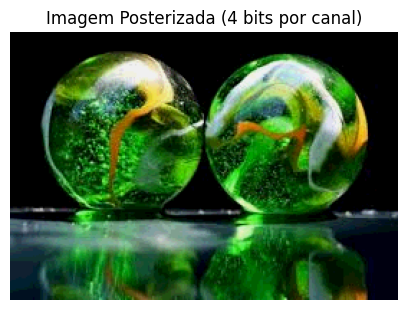

In [34]:
# 3. Reduzir a quantização (posterizar a imagem)
# Posterização reduz o número de tons por canal
def posterize_image(img, bits):
    return ImageOps.posterize(img, bits)
posterized_img_4b = posterize_image(img, 4)
posterized_img_4b.save("posterizada_4bits.png")
show_img(posterized_img_4b, "Imagem Posterizada Nv.16 (4 bits por canal )")

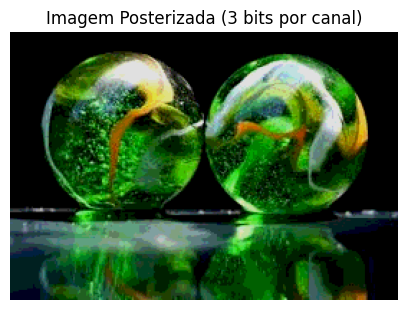

In [33]:
posterized_img_3b = posterize_image(img, 3)
posterized_img_3b.save("posterizada_3bits.png")
show_img(posterized_img_3b, "Imagem Posterizada Nv.8 (3 bits por canal)")

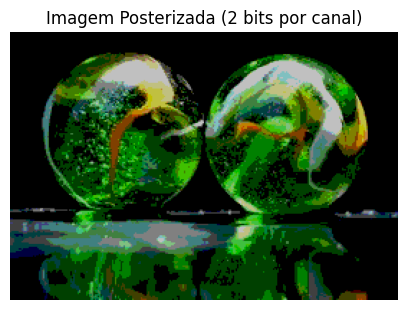

In [35]:
posterized_img_2b = posterize_image(img, 2)
posterized_img_2b.save("posterizada_2bits.png")
show_img(posterized_img_2b, "Imagem Posterizada Nv.4 (2 bits por canal)")

O Nivel 8 Já é possivel perceber a queda na qualidade

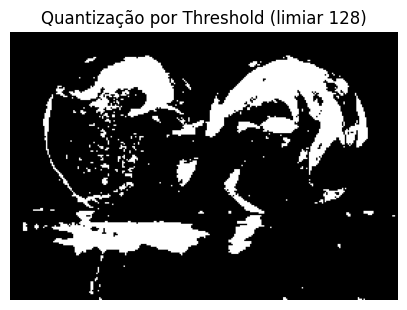

In [70]:
# 5. Quantização por threshold (limiar simples)
def threshold_quantization(img, threshold=128):
    gray = img.convert("L")
    bw = gray.point(lambda x: 255 if x > threshold else 0, mode='1')
    return bw

threshold_img = threshold_quantization(img)
threshold_img.save("threshold.png")
show_img(threshold_img, "Quantização por Threshold (limiar 128)", cmap="gray")


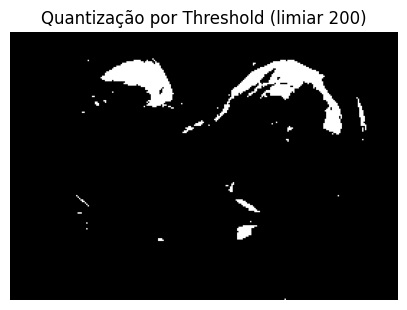

In [42]:
# 5. Quantização por threshold (limiar simples)
def threshold_quantization(img, threshold=200):
    gray = img.convert("L")
    bw = gray.point(lambda x: 255 if x > threshold else 0, mode='1')
    return bw

threshold_img = threshold_quantization(img)
threshold_img.save("threshold.png")
show_img(threshold_img, "Quantização por Threshold (limiar 200)", cmap="gray")

Anote: Como o valor de corte influencia o contraste da imagem?
- Com valores baixos de threshold os pixels aparecem mais claros, ja com valores mais altos os pixels tendem a ficar escoros ou pretos afetando diretamente o contrastre da imagem

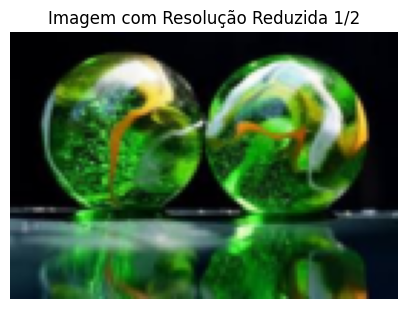

In [48]:
# 2. Reduzir a resolução (reescala com reamostragem)
resized_img = img.resize((img.width // 2, img.height // 2), Image.BILINEAR)
resized_img.save("saida.png")
show_img(resized_img, "Imagem com Resolução Reduzida 1/2")

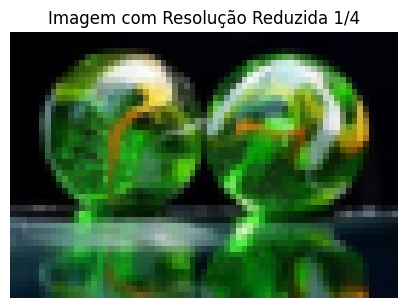

In [49]:
resized_img = img.resize((img.width // 4, img.height // 4), Image.BILINEAR)
resized_img.save("saida.png")
show_img(resized_img, "Imagem com Resolução Reduzida 1/4")

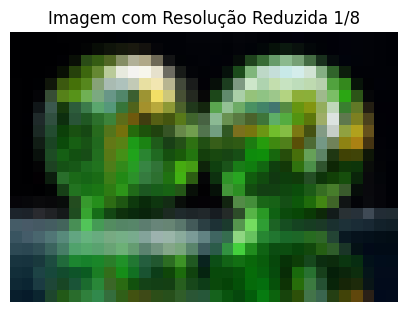

In [50]:
resized_img = img.resize((img.width // 8, img.height // 8), Image.BILINEAR)
resized_img.save("saida.png")
show_img(resized_img, "Imagem com Resolução Reduzida 1/8")

Anote: A partir de qual ponto os detalhes começam a desaparecer significativamente?
- No 1/4 a maior parte dos detalhes são perdidos

JPEG: 11.32 KB


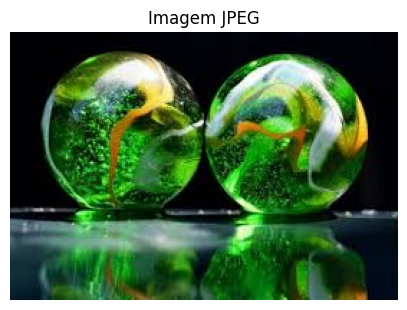

PNG: 80.99 KB


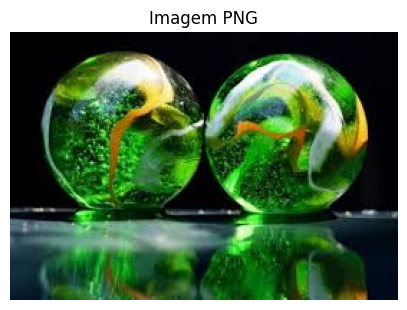

BMP: 148.34 KB


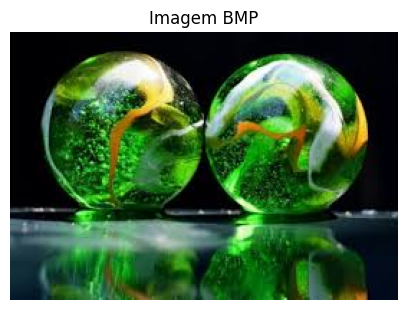

GIF: 39.06 KB


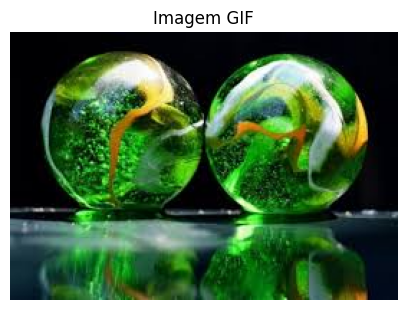

In [54]:
# 8. Salvar em vários formatos e mostrar tamanhos
formats = ['JPEG', 'PNG', 'BMP', 'GIF']
for fmt in formats:
    path = f"imagem.{fmt.lower()}"
    img.save(path, format=fmt)
    size_kb = os.path.getsize(path) / 1024
    print(f"{fmt}: {size_kb:.2f} KB")
    show_img(img_rgb, f"Imagem {fmt}")

Mesmo que cada modelo de compressão tenha um tamanho diferente as imagens continuam semelenates em questão de qualidade mesmo tende uma quande diferença de tamanho

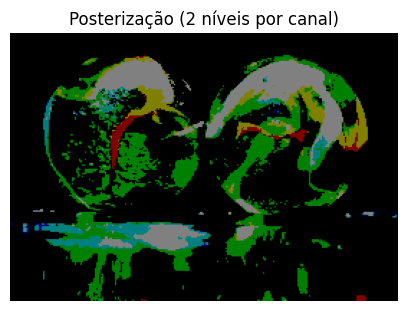

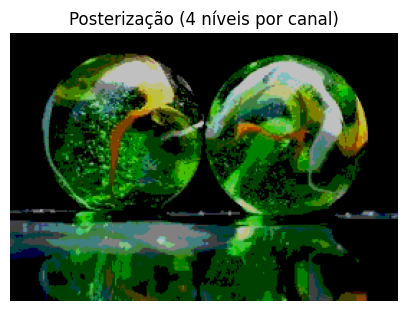

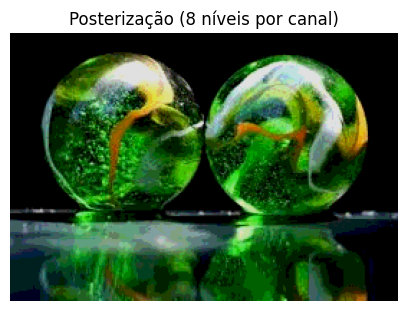

In [57]:
def posterize_image(img, bits):
    return ImageOps.posterize(img, bits)

# Posterização com 1 bit por canal (2 níveis por canal)
poster_2_levels = posterize_image(img, 1)
poster_2_levels.save("poster_2_niveis.png")
show_img(poster_2_levels, "Posterização (2 níveis por canal)")

# Posterização com 2 bits por canal (4 níveis por canal)
poster_4_levels = posterize_image(img, 2)
poster_4_levels.save("poster_4_niveis.png")
show_img(poster_4_levels, "Posterização (4 níveis por canal)")

# Posterização com 3 bits por canal (8 níveis por canal)
poster_8_levels = posterize_image(img, 3)
poster_8_levels.save("poster_8_niveis.png")
show_img(poster_8_levels, "Posterização (8 níveis por canal)")

In [ ]:
Anote: O efeito visual lembra algum estilo artístico?
- Parece o estilo artisitico RETRO utilizado em jogos antigos (Snes e N64) e jogos atuais de Metroidvania

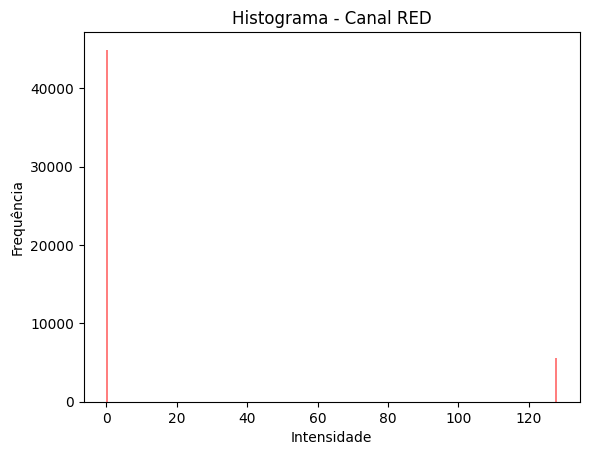

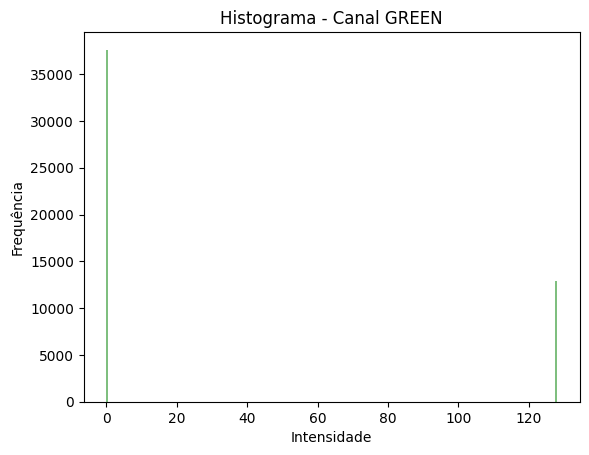

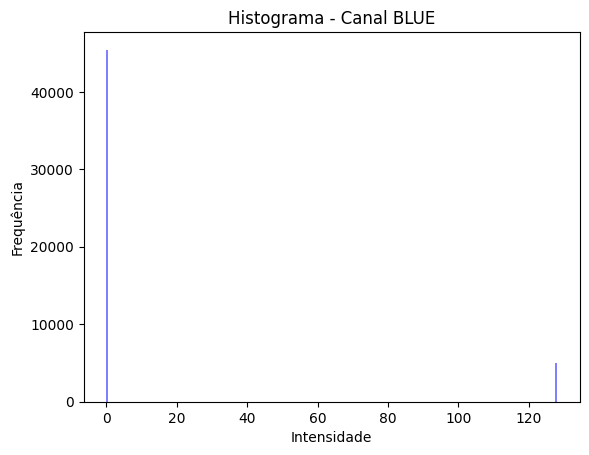

In [63]:
## 2 Nivels
img_np = np.array(poster_2_levels)
colors = ['red', 'green', 'blue']
for i, color in enumerate(colors):
    plt.hist(img_np[:, :, i].flatten(), bins=256, color=color, alpha=0.5)
    plt.title(f"Histograma - Canal {color.upper()}")
    plt.xlabel("Intensidade")
    plt.ylabel("Frequência")
    plt.show()

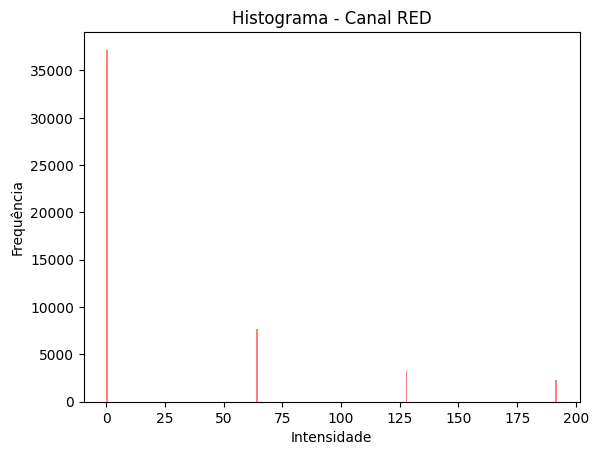

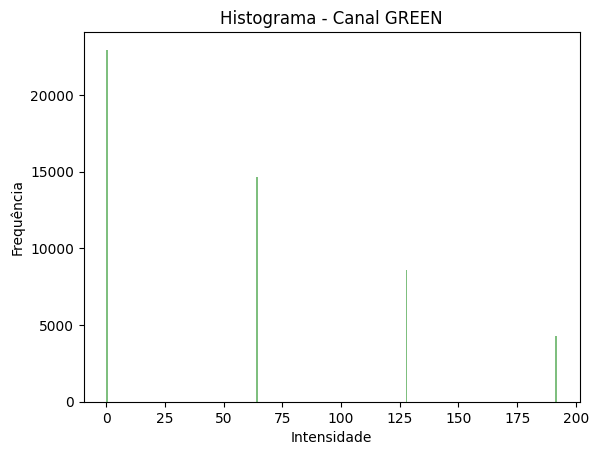

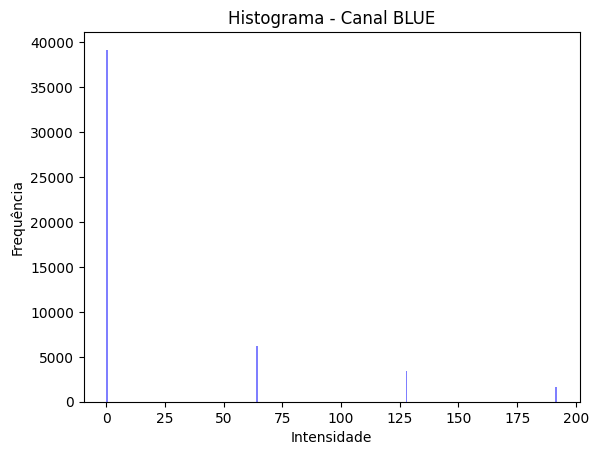

In [65]:
## 4 Niveis
img_np = np.array(poster_4_levels)
colors = ['red', 'green', 'blue']
for i, color in enumerate(colors):
    plt.hist(img_np[:, :, i].flatten(), bins=256, color=color, alpha=0.5)
    plt.title(f"Histograma - Canal {color.upper()}")
    plt.xlabel("Intensidade")
    plt.ylabel("Frequência")
    plt.show()

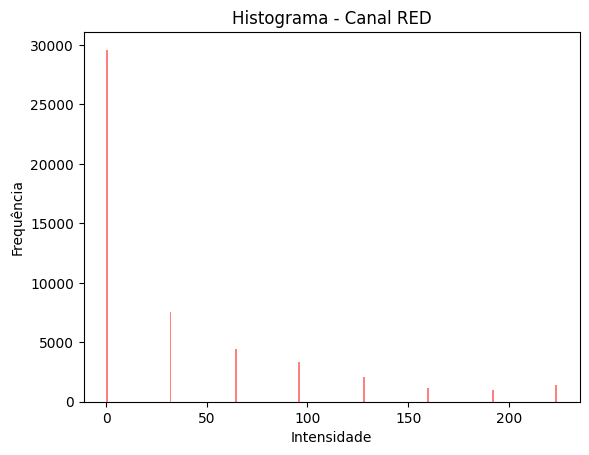

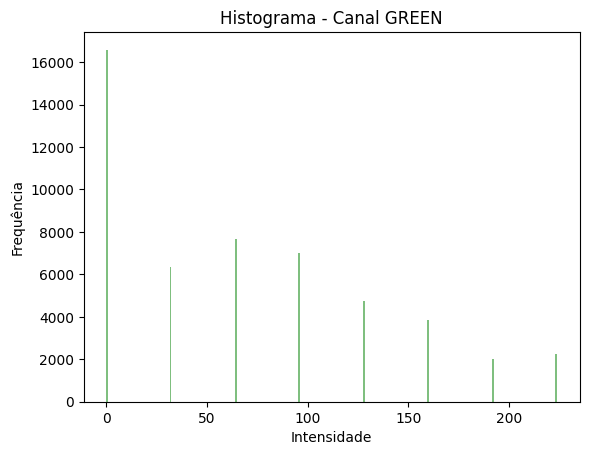

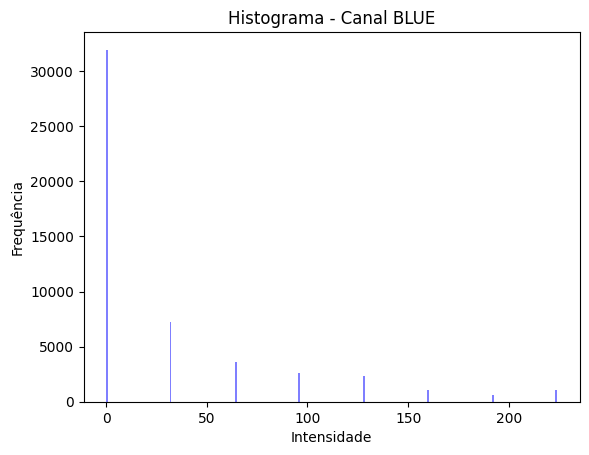

In [66]:
## 8 Niveis
img_np = np.array(poster_8_levels)
colors = ['red', 'green', 'blue']
for i, color in enumerate(colors):
    plt.hist(img_np[:, :, i].flatten(), bins=256, color=color, alpha=0.5)
    plt.title(f"Histograma - Canal {color.upper()}")
    plt.xlabel("Intensidade")
    plt.ylabel("Frequência")
    plt.show()

Anote: Como o histograma ajuda a entender as alterações feitas?
- É mais facil de notar a expresividade da pigmentação do pixeis por mei do histograma, que nesse caso fica evidende o aumento da intensidade conforme o niveis maiores são analizados

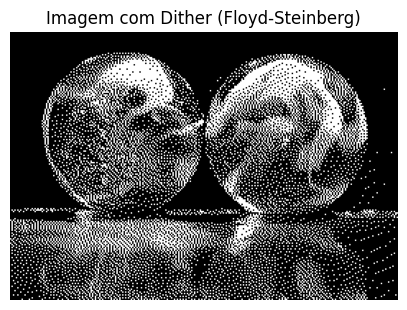

In [73]:
# 6. Dithering com Pillow
dithered_img = img.convert("1")  # Converte para preto e branco com dithering (Floyd-Steinberg)
dithered_img.save("dither.png")
show_img(dithered_img, "Imagem com Dither (Floyd-Steinberg)", cmap="gray")


In [71]:
Melhora sim a aparencia da imagem